# <img src="ups.png">

### Nombre: Fanny Gutama
### Docente: Ing. Diego Quisi

## Prueba.

# Enunciado:

* Diseñe y desarrolle un modelo y/o script que permita simular el siguiente caso real:

* Investigar los datos de los paises contigados por COVID-19, especialmente de latinoamerica (menos Ecuador), deberán escoger uno y que no se repita, para ello se va a seleccionar el orden en el que publique dentro del foro “Tema prueba 1”, con estos datos obtener los siguientes modelos:

* Generar un modelo matematico de prediccion para regresion lineal, exponencial, polinomico y logaritmico, de los nuevos contactos en la proxima semana (7 dias despues).

# Surinam

In [43]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt
%matplotlib inline


In [44]:
url = 'owid-covid-data.csv'
df = pd.read_csv(url)
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-02,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56106,NaN,NaN,International,2020-11-07,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56107,NaN,NaN,International,2020-11-08,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56108,NaN,NaN,International,2020-11-09,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56109,NaN,NaN,International,2020-11-10,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:

df = df[df['location'].isin(['Suriname'])] 
df = df.loc[:,['date','total_cases']] 
FMT = '%Y-%m-%d'
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-03-09", FMT)).days)

df

,date,total_cases
47735,6,1.0
47736,12,1.0
47737,13,5.0
47738,14,5.0
47739,15,6.0
...,...,...
47967,243,5227.0
47968,244,5234.0
47969,245,5239.0
47970,246,5241.0


## Regresion Lineal

Ecuación
m = [29.09767398] b = -1735.5599079744727
Predicción
[5364.2725429]


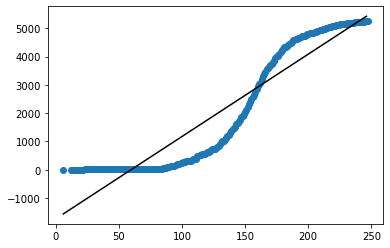

In [35]:

x = list(df.iloc [:, 0]) 
y = list(df.iloc [:, 1])
regr = linear_model.LinearRegression()
regr.fit(np.array(x).reshape(-1, 1) ,y)
print("Ecuación")
print('m = ' + str(regr.coef_) + ' b = ' + str(regr.intercept_))
print("Predicción")
y_predict = regr.predict([[len(x)+7]])
print(y_predict)
plt.scatter(x,y)
x_real = np.array(range(min(x),max(x)))
plt.plot(x_real, regr.predict(x_real.reshape(-1,1)), color='black')
plt.show()

## Regresion exponencial

[0.03706879 1.43745609]
Predicción
33126.956119718554


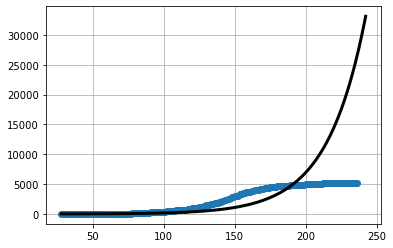

In [42]:
xexp = np.arange(1,len(df)+1,1) # Fecha
yexp = np.array(df.values[:,1],dtype='float') # Numero de casos

xexp = xexp[27:len(xexp)-1]
yexp = yexp[27:len(yexp)-1]

curve_fit=np.polyfit(xexp,np.log(yexp),1)
print(curve_fit)

pred_x=np.array(list(range(min(xexp),max(xexp)+7)))
yx=np.exp(curve_fit[1])*np.exp(curve_fit[0]*pred_x)
print("Predicción")
print(yx[len(yx)-1])
plt.plot(xexp,yexp,"o")
plt.plot(pred_x,yx,color='black',linewidth=3.0)
plt.grid(True)
plt.show()

## Regresion Polinomico


           5             4           3         2
9.878e-08 x - 7.737e-05 x + 0.01965 x - 1.764 x + 54.89 x - 375.8
Predicción
4714.5


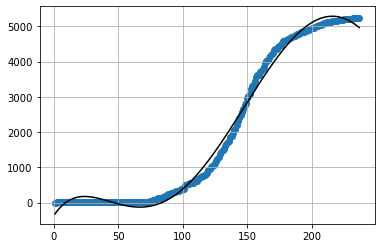

In [36]:
xpol = np.arange(1,len(df)+1,1,dtype='float') 
ypol = np.array(df.values[:,1],dtype='float') 
funcion_polinomial = np.poly1d(np.polyfit(xpol,ypol,5))
print(funcion_polinomial)

print("Predicción")
print(round(funcion_polinomial(len(xpol)+7),2))
y_pred = funcion_polinomial(xpol)

plt.scatter(xpol,ypol)
plt.plot(xpol,y_pred, c='black')
plt.grid(True)
plt.show()

## Regresion logaritmico

Predicción
3629.997595071727


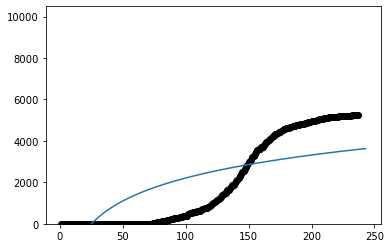

In [40]:
def modelo_logistico(x,a,b):
    return a+b*np.log(x)

xlog = np.arange(1,len(df)+1,1)
ylog = np.array(df.values[:,1]) 

exp_fit = curve_fit(modelo_logistico,xlog,ylog) 

pred_x = list(range(min(xlog),max(xlog)+7))
plt.scatter(xlog,ylog,color='black')
val = [modelo_logistico(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x]
print("Predicción")
print(val[len(pred_x)-1])
plt.plot(pred_x, [modelo_logistico(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x])
plt.ylim(0,max(y)*2)
plt.show()

# Generar un modelo probabilistico con los datos.

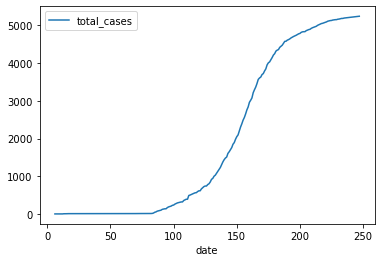

In [38]:
df.plot(x='date',y='total_cases')

In [39]:

filtro = df['total_cases'][27:]
media = filtro.mean()
mediana = filtro.median()
print(media)
print(mediana)
print("Predicción")
print(int(y[-1] + mediana))

2275.7428571428572
1558.5
Predicción
6803


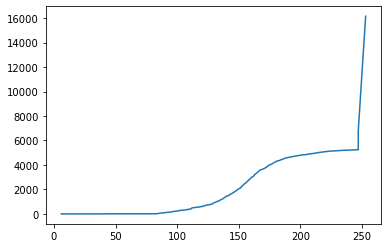

Predicción
17709


In [34]:
for i in range(x[-1], x[-1]+7):
    x.append(i)
    y.append(int(y[-1]+mediana))
predict = int(y[-1] + mediana)
plt.plot(x,y)
plt.show()
print("Predicción")
print(predict)

## Finalmente, contrarestar los modelos matematicos y generar las siguientes conclusiones

* ¿Cual tiene una mejor prediccion?
EL modelo que tiene la mejor predicion es el Polinomico, ya que en su predicion casi nos da el numero exacto sin tanto decimales, los decimales causan variacion en los resultados a la hora de aser los calculos.
* Ventajas y desventajas de los modelos.
- Ventajas
    * El modelo lineal es facil de implementar 
    * El modelo lineal son mas rapidas de implementar.
    * El modelo logaritmico es facil de modelar
    * EL modelo exponencial no necesita un gran volumen de datos historicos.
    * El medelo polinmial modela bien los datos no lineales
    * El modelo polinomial es la solucion cuando los datos no son lienales.
- Desventajas
    * El modelo lineal no se puede utilizar con ecuaciones complejas.
    * El modelo logoritmico no se puede ajustar alos datos no lineales.
    * El modelo exponencial no modela correlaciones.
    * El modelo polinomial necesita datos especificos.
* Cual es el principal problema del modelo probabilistico
Su principal problema es no trabajar gran volumen de datos, ya que comete muchos errores  y da como resultado una prediccion erronea.
